In [3]:
# -*- coding: utf-8 -*-
# unsupervised analysis of correlation of Free Text with Network Topology 

"""
algorithms we used:
*Hierarchical
*Kmeans
*PCA
*DBSCAN
@author: Yuval Samoilov-Katz
"""
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
        
snaps = [1,2,10,19]
clusters = 2
for snap in snaps:
    dataset = pd.read_csv('Data/snap_{}_dois_100.csv'.format(snap))
    X = dataset.iloc[:, 1:20].values
    DOIs = dataset['DOIs'].values
    base = np.arange(0,len(DOIs),1)
    ## Hierarchical analysis to explore main clusters
    fig, axes = plt.subplots(figsize=(16,12), nrows=1, ncols=1)
    
    ### visualize dendogram
    dend1 = shc.dendrogram(shc.linkage(X, method='ward'),labels=DOIs , orientation='right',ax=axes)
    axes.title.set_text(f'Snap:{snap}\nHierarchical Clustering of Free Text and Network Topology Correlation')
    plt.axvline(x=0.55, color='black') 
    plt.axvline(x=0.27,linestyle='--',) 
    plt.savefig(f'Results/Hierarchical_{snap}')
    
    ## Kmeans analysis
    kmeans = KMeans(n_clusters=clusters)
    kmeans.fit(X)
    
    fig, ax = plt.subplots(figsize=(14,10), nrows=3, ncols=1)    
    for i,feature in enumerate(dataset.columns[:-1]):
        ax[0].scatter(base, X[:,i], label=f'{feature}')
        ax[1].scatter(base, X[:,i], c=kmeans.labels_, cmap='rainbow')
        
    
    ax[0].title.set_text(f'Snap:{snap}\nCorrelation of Free Text with Network Topology')
    ax[0].set_ylabel('Corr')
    ax[1].title.set_text('KMeans Clustering')
    ax[1].set_xlabel('DOI"s Number')
    ax[1].set_ylabel('Corr')
    
    ### Elbow method to determine the number of clusters
    distortions = []
    K = range(1,20)
    for k in K:
        kmeanModel = KMeans(n_clusters=k).fit(X)
        kmeanModel.fit(X)
        distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])                   
    
    ax[2].plot(K, distortions, 'bx-')
    ax[2].set_xlabel('k')
    ax[2].set_ylabel('Distortion')
    ax[2].title.set_text('The Elbow Method - optimal k')

    plt.tight_layout()
    plt.savefig(f'Results/Kmeans_{snap}')

<Figure size 432x288 with 0 Axes>

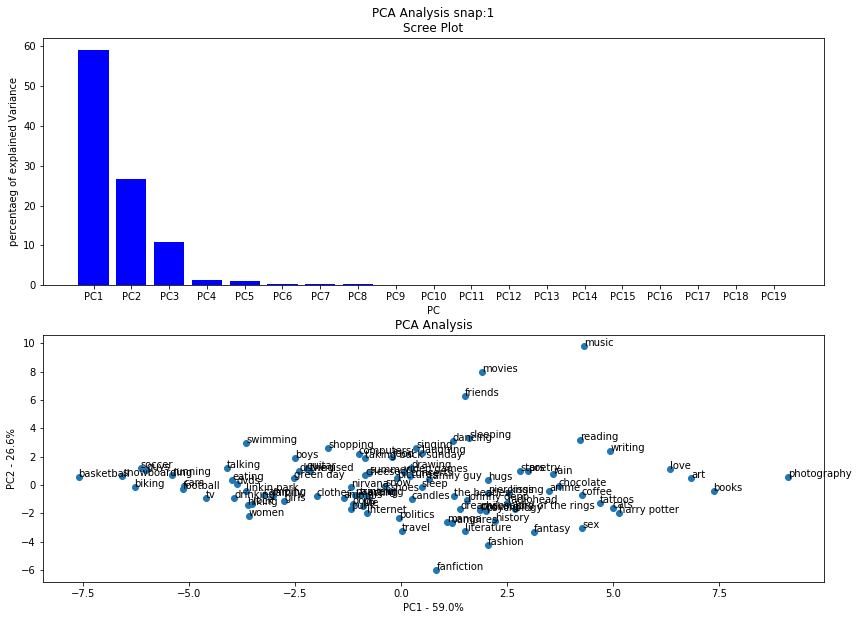

<Figure size 1008x720 with 0 Axes>

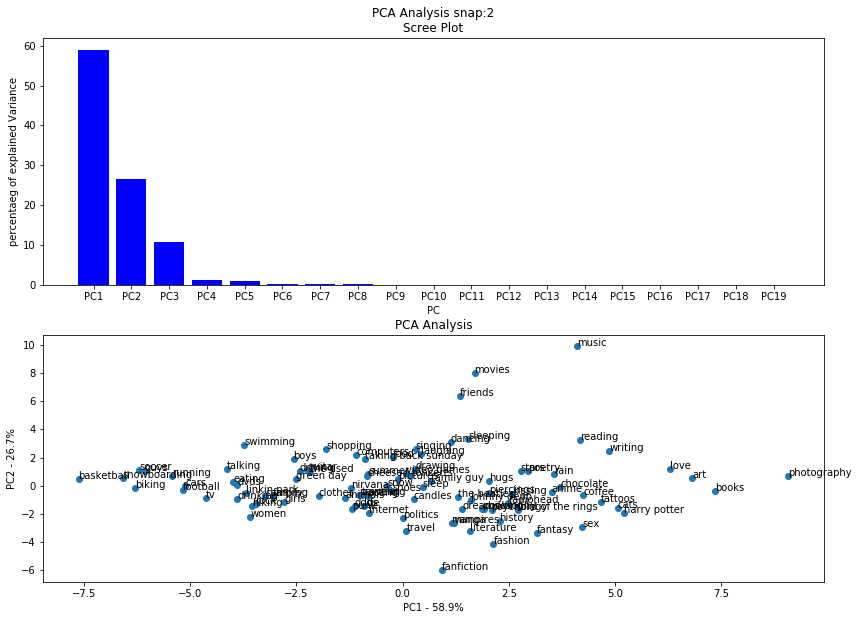

<Figure size 1008x720 with 0 Axes>

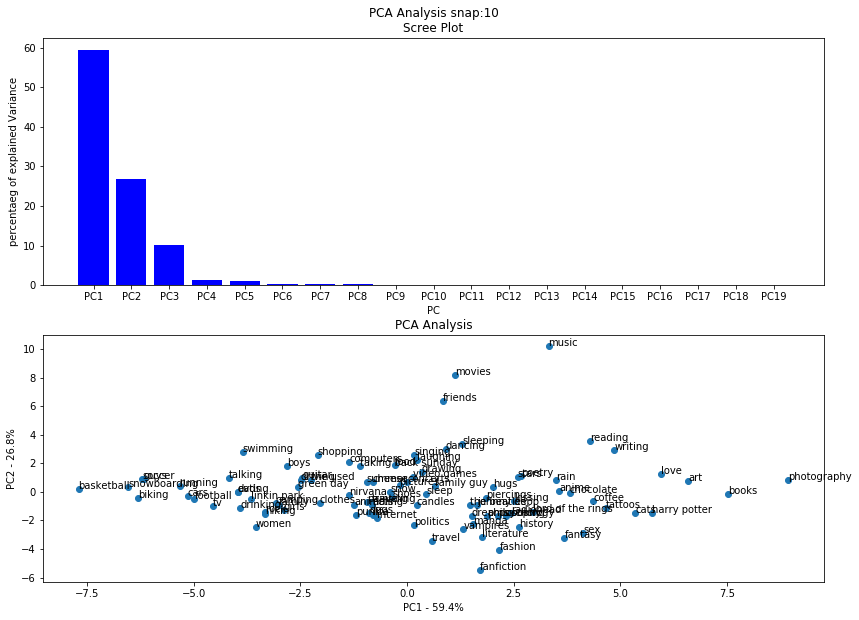

<Figure size 1008x720 with 0 Axes>

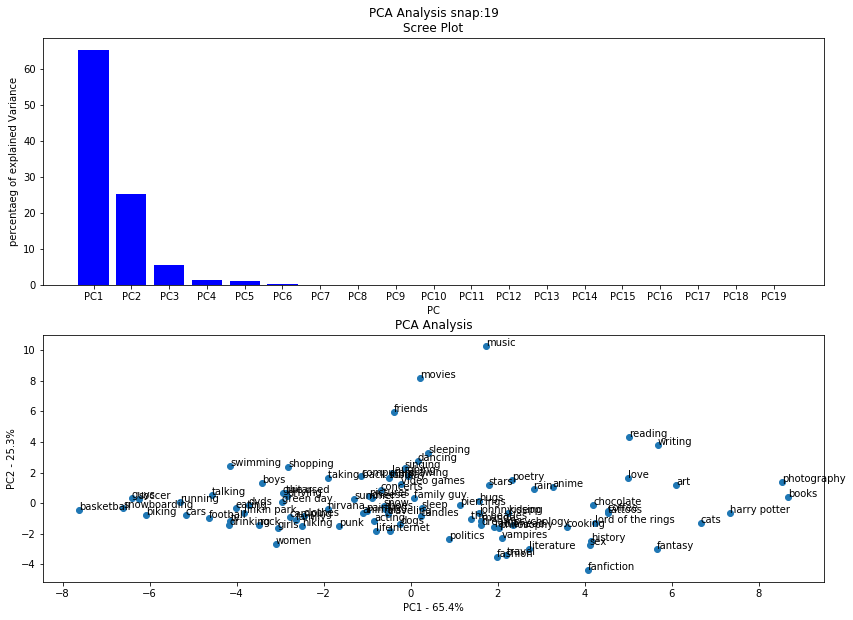

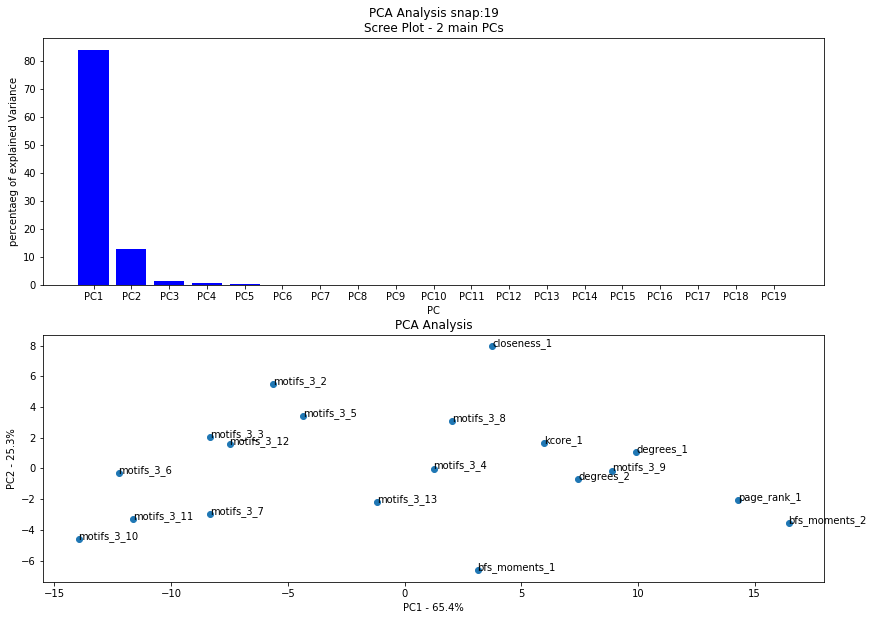

In [2]:
# PCA Analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing
%matplotlib inline

for snap in snaps:
    plt.clf()
    dataset = pd.read_csv('Data/snap_{}_dois_100.csv'.format(snap),index_col=0)

    fig, ax = plt.subplots(figsize=(14,10), nrows=2, ncols=1)    

    ## PCA analysis for explaining the main clusters of DOIs
    norm_data = preprocessing.scale(dataset)
    pca = PCA()
    pca.fit(norm_data)
    pca_data = pca.transform(norm_data)

    ## exploring number of PC affect on variance
    exp_var = np.round(pca.explained_variance_ratio_ *100, decimals=1)
    labels = ['PC' + str(n) for n in range(1,len(exp_var)+1)]
    ax[0].bar(x=range(1,len(exp_var)+1),height=exp_var, tick_label=labels,color='b')
    ax[0].set_ylabel('percentaeg of explained Variance')
    ax[0].set_xlabel('PC')
    ax[0].set_title(f'PCA Analysis snap:{snap}\nScree Plot')        
    
    #main PC
    pca_df = pd.DataFrame(pca_data, columns=labels,index=dataset.index)
    ax[1].scatter(pca_df.PC1,pca_df.PC2)
    ax[1].set_title(f'PCA Analysis')
    ax[1].set_xlabel(f'PC1 - {exp_var[0]}%')
    ax[1].set_ylabel(f'PC2 - {exp_var[1]}%')
    
    #print(pca_df.index)
    for doi in pca_df.index:
        ax[1].annotate(doi,(pca_df.PC1.loc[doi], pca_df.PC2.loc[doi]))
    plt.savefig(f'Results/DOIs_PCA_{snap}')
    
    fig, ax = plt.subplots(figsize=(14,10), nrows=2, ncols=1)    

    ## PCA analysis for explaining the main clusters of features
    norm_data2 = preprocessing.scale(dataset.T)
    pca2 = PCA()
    pca2.fit(norm_data2)
    pca_data2 = pca2.transform(norm_data2)

    ## exploring number of PC affect on variance
    exp_var2 = np.round(pca2.explained_variance_ratio_ *100, decimals=1)
    labels = ['PC' + str(n) for n in range(1,len(exp_var2)+1)]
    ax[0].bar(x=range(1,len(exp_var2)+1),height=exp_var2, tick_label=labels,color='b')
    ax[0].set_ylabel('percentaeg of explained Variance')
    ax[0].set_xlabel('PC')
    ax[0].set_title(f'PCA Analysis snap:{snap}\nScree Plot - 2 main PCs')        
    
    #main PC
    pca_df2 = pd.DataFrame(pca_data2, columns=labels,index=dataset.columns)
    ax[1].scatter(pca_df2.PC1,pca_df2.PC2)
    ax[1].set_title(f'PCA Analysis')
    ax[1].set_xlabel(f'PC1 - {exp_var[0]}%')
    ax[1].set_ylabel(f'PC2 - {exp_var[1]}%')
    for feature in pca_df2.index:
        ax[1].annotate(feature,(pca_df2.PC1.loc[feature], pca_df2.PC2.loc[feature]))
    plt.savefig(f'Results/Features_PCA_{snap}')

    
    

Estimated number of clusters: 3
Estimated number of noise points: 5
Homogeneity: 0.090
Completeness: 1.000
V-measure: 0.166
Adjusted Rand Index: 0.000
Adjusted Mutual Information: -0.000
Silhouette Coefficient: 0.229
Estimated number of clusters: 3
Estimated number of noise points: 5
Homogeneity: 0.090
Completeness: 1.000
V-measure: 0.166
Adjusted Rand Index: 0.000
Adjusted Mutual Information: -0.000
Silhouette Coefficient: 0.229
Estimated number of clusters: 2
Estimated number of noise points: 7
Homogeneity: 0.081
Completeness: 1.000
V-measure: 0.149
Adjusted Rand Index: 0.000
Adjusted Mutual Information: -0.000
Silhouette Coefficient: 0.281
Estimated number of clusters: 3
Estimated number of noise points: 5


C:\Users\samoi\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\samoi\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\samoi\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\samoi\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use a

Homogeneity: 0.090
Completeness: 1.000
V-measure: 0.166
Adjusted Rand Index: 0.000
Adjusted Mutual Information: -0.000
Silhouette Coefficient: 0.261


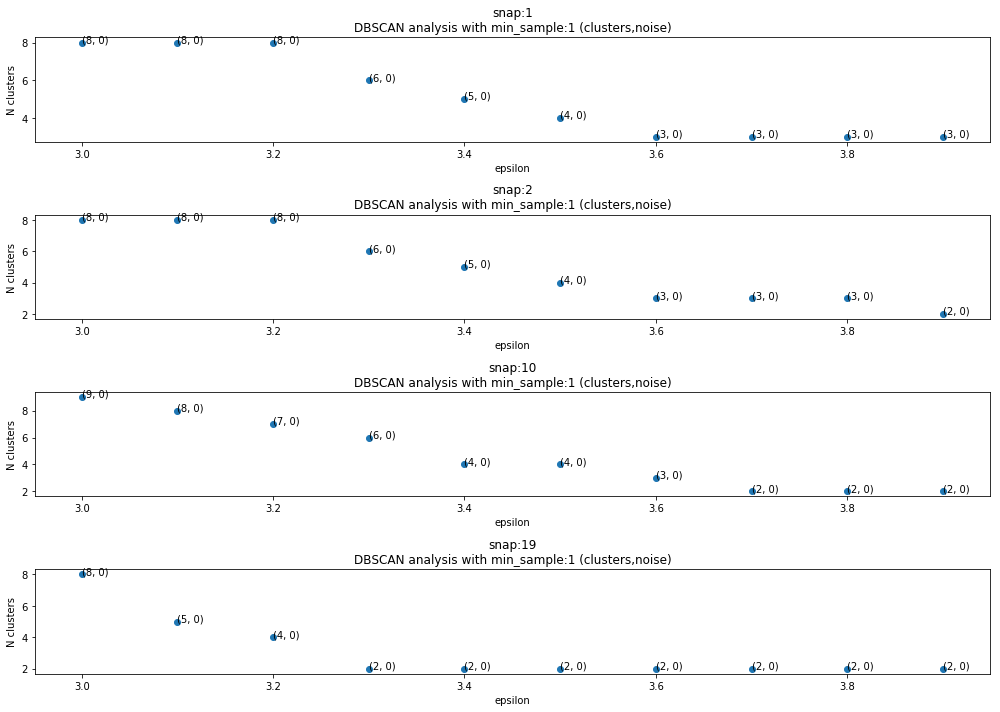

<Figure size 1008x720 with 0 Axes>

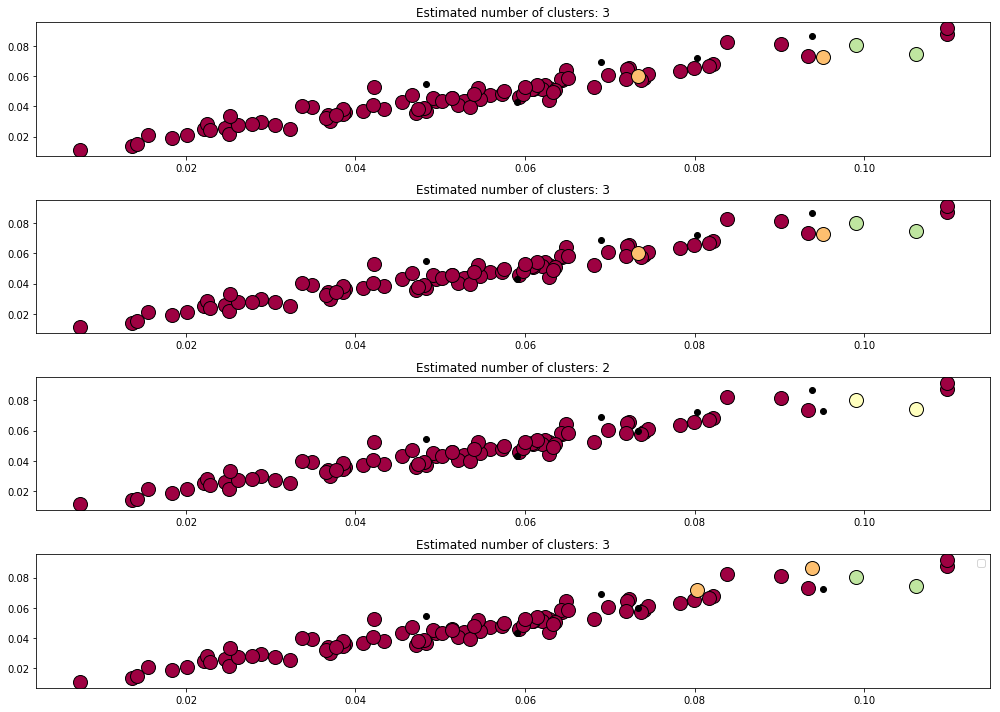

In [145]:
# DBSCAN
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

snaps = [1,2,10,19]
min_samples = [1,2]

## preprocessing - exploring number of min_sample and epsilons for DBSCAN
for s in min_samples:
    fig, ax = plt.subplots(figsize=(14,10), nrows=4, ncols=1)    
    for i,snap in enumerate(snaps):
        dataset = pd.read_csv('Data/snap_{}_dois_100.csv'.format(snap))
        labels_true = dataset.iloc[:,0]
        x = StandardScaler().fit_transform(dataset.iloc[:,1:])
        epes = range(30,40)   
        clusters = []
        noises = []
        epsilons = []

        for e in epes:
            db = DBSCAN(eps=(e/10),min_samples=s).fit(x)
            core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
            core_samples_mask[db.core_sample_indices_] = True
            labels = db.labels_
            n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
            if n_clusters_>1:
                epsilons.append(e/10)
                clusters.append(n_clusters_)
                n_noise_ = list(labels).count(-1)
                noises.append(n_noise_)

        for j,_ in enumerate(clusters):
           ax[i].annotate(f'{clusters[j],noises[j]}',(epsilons[j], clusters[j]))

        ax[i].scatter(epsilons, clusters)
        ax[i].set_title(f'snap:{snap}\nDBSCAN analysis with min_sample:{s} (clusters,noise)')
        ax[i].set_ylabel('N clusters')
        ax[i].set_xlabel('epsilon')

    plt.tight_layout()
    plt.savefig(f'Results/DBSCAN_exploring_clusters_min{s}')

plt.clf()
min_sample = 2
e = 3

## using optimal epsilons for DBSCAN
'''
fig, ax = plt.subplots(figsize=(14,10), nrows=4, ncols=1)    
for i,snap in enumerate(snaps):
    dataset = pd.read_csv('Data/snap_{}_dois_100.csv'.format(snap))
    labels_true = dataset.iloc[:,0]
    x = StandardScaler().fit_transform(dataset.iloc[:,1:])

    db = DBSCAN(eps=e,min_samples=s).fit(x)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    #some statistics
    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
    print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
    print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
    print("Adjusted Rand Index: %0.3f"% metrics.adjusted_rand_score(labels_true, labels))
    print("Adjusted Mutual Information: %0.3f"% metrics.adjusted_mutual_info_score(labels_true, labels))
    print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X, labels))

    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)
        xy = X[class_member_mask & core_samples_mask]
        ax[i].plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        ax[i].plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    ax[i].set_title('Estimated number of clusters: %d' % n_clusters_)
    
plt.legend()
plt.tight_layout()
plt.savefig(f'Results/DBSCAN_clusters')
'''

### 